## A simple analysis of the output of the boolean model with pcdl

In [10]:
import pcdl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [22]:
output_dir = "/home/oth/BSC/MN5mount/AGS/EMEWS/model/PhysiBoSS/output"

mcdsts = pcdl.TimeSeries(output_path = output_dir, graph=False)

list_of_relevant_vars = list()
all_data = pd.DataFrame()
for mcds in mcdsts.get_mcds_list():
    frame_df = mcds.get_cell_df()
    frame_df.reset_index(inplace=True)
    list_of_relevant_vars.append(frame_df)

all_data = pd.concat(list_of_relevant_vars, ignore_index=True)

reading: /home/oth/BSC/MN5mount/AGS/EMEWS/model/PhysiBoSS/output/PhysiCell_settings.xml
Warning @ pyMCDS._read_setting_xml : <cell_definition name="default" ID="0"><phenotype><cycle><phase_durations> node missing.
Warning @ pyMCDS._read_setting_xml : cell_definition custom_data without variable type setting detected. ['K_half_apoptosis', 'K_half_growth', 'apoptosis_mapping_type', 'apoptosis_rate_basal', 'basal_growth_rate', 'drug_X_Hill_coeff', 'drug_X_half_max', 'drug_X_koff', 'drug_X_kon', 'drug_X_mapping_type', 'drug_X_permeability', 'drug_X_target_conc', 'drug_Y_Hill_coeff', 'drug_Y_half_max', 'drug_Y_mapping_type', 'drug_Y_permeability', 'growth_mapping_type', 'hill_coeff_apoptosis', 'hill_coeff_growth', 'hill_coeff_pressure', 'max_apoptosis_rate', 'pressure_half', 'pressure_threshold', 'response_rate_apoptosis', 'response_rate_growth', 'sample', 'w_anti_BAD', 'w_anti_BAX', 'w_anti_BCL2', 'w_anti_Caspase8', 'w_anti_Caspase9', 'w_anti_CytochromeC', 'w_anti_FOXO', 'w_anti_p53', 'w_p

#### simple plot of the maboss parameters over time


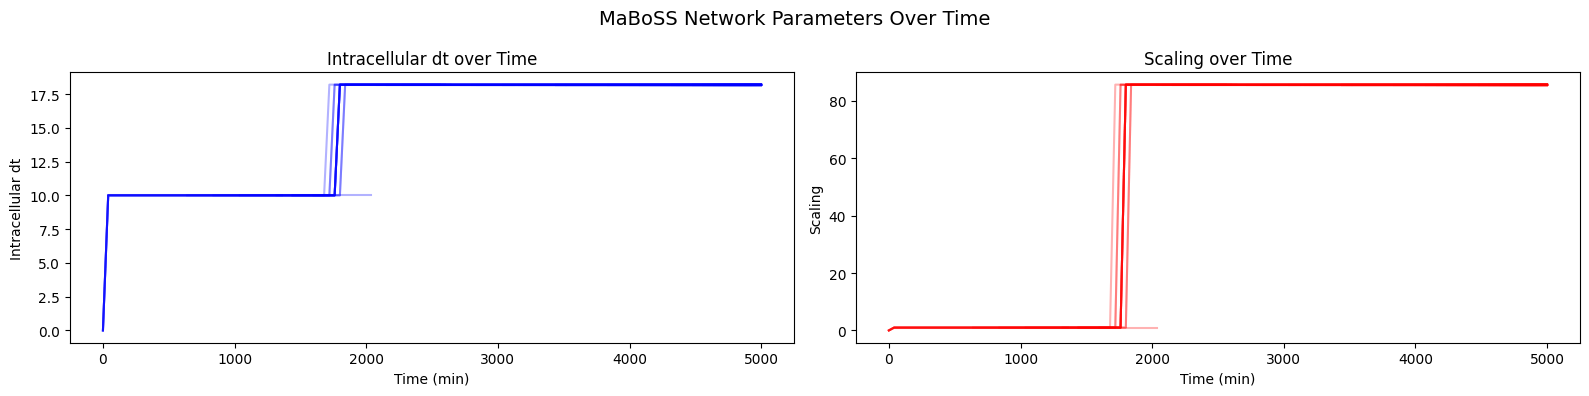

In [8]:
# keep only the "intrcellular_dt" and "scaling" columns
maboss_data = all_data[['time', 'ID', 'intracellular_dt', 'scaling']]

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Left plot: intracellular_dt
sns.lineplot(data=maboss_data, 
            x='time', 
            y='intracellular_dt',
            units='ID',  # This tells seaborn to plot one line per ID
            estimator=None,  # Don't compute an average
            alpha=0.3,  # Make individual lines very transparent
            color='blue',
            ax=ax1)

ax1.set_title('Intracellular dt over Time')
ax1.set_xlabel('Time (min)')
ax1.set_ylabel('Intracellular dt')

# Right plot: scaling
sns.lineplot(data=maboss_data, 
            x='time', 
            y='scaling',
            units='ID',  # This tells seaborn to plot one line per ID
            estimator=None,  # Don't compute an average
            alpha=0.3,  # Make individual lines very transparent
            color='red',
            ax=ax2)

ax2.set_title('Scaling over Time')
ax2.set_xlabel('Time (min)')
ax2.set_ylabel('Scaling')

# Add a main title
plt.suptitle('MaBoSS Network Parameters Over Time', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### plotting S_anti_real and S_anti_extended over time (for each ID)

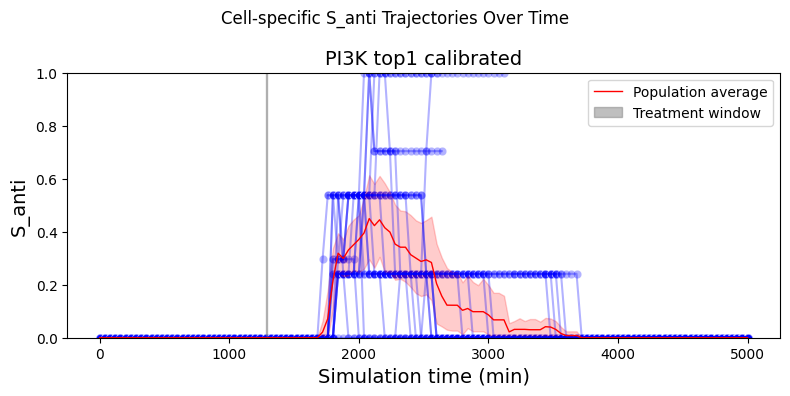

In [9]:
S_anti_data = all_data[['ID', 'time', 'S_anti_real', 'S_anti_extended']]

# Create figure with larger size for better visibility
plt.figure(figsize=(8, 4))

# Plot individual trajectories for each cell
# Use low alpha (transparency) to show density of trajectories
sns.lineplot(data=S_anti_data, 
            x='time', 
            y='S_anti_extended',
            units='ID',  # This tells seaborn to plot one line per ID
            estimator=None,  # Don't compute an average
            alpha=0.3,  # Make individual lines very transparent
            color='blue')

sns.scatterplot(data=S_anti_data, 
            x='time', 
            y='S_anti_extended',
            alpha=0.3,  # Make individual lines very transparent
            color='blue')

# Add an average trend line on top
sns.lineplot(data=S_anti_data,
            x='time',
            y='S_anti_extended',
            color='red',
            linewidth=1,
            label='Population average')

# Add title and labels
plt.suptitle('Cell-specific S_anti Trajectories Over Time')
# add a subtitle with the PI3K top1 calibrated
plt.title('PI3K top1 calibrated', fontsize=14)
plt.xlabel('Simulation time (min)', fontsize=14)
plt.ylabel('S_anti', fontsize=14)
# plt.xlim(0, 5000)
plt.ylim(0, 1)

# Add shaded area between 500 and 600 (if this is still relevant)
plt.axvspan(1280, 1292, color='gray', alpha=0.5, label='Treatment window')

# Adjust legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Save the plot
output_dir = "./results/trajectories_real_readouts_steady_and_transient_with_network_reset_test"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/S_anti_extended_trajectories_PI3K_top1_calibrated.png', dpi=300)
plt.show()

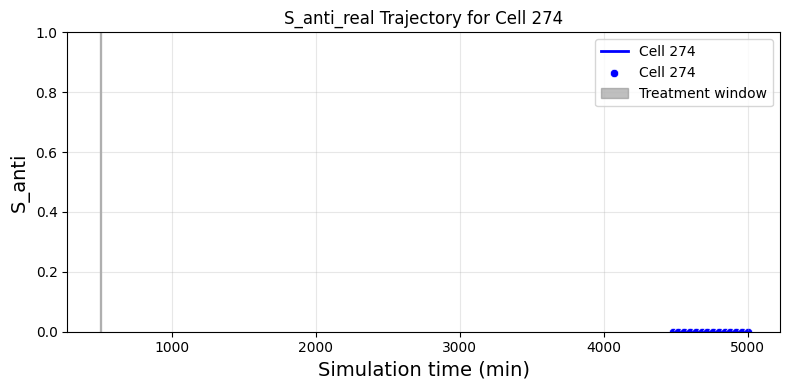

In [36]:
# Select a specific ID (for example, ID = 0)

# get a random cell id between the ones in S_anti_real_data
anti_cell_id = np.random.choice(S_anti_data['ID'].unique())
# anti_cell_id = 21
anti_single_cell_data = S_anti_data[S_anti_data['ID'] == anti_cell_id]

# Create figure
plt.figure(figsize=(8, 4))

# Plot trajectory for single cell
sns.lineplot(data=anti_single_cell_data,
            x='time',
            y='S_anti_extended',
            color='blue',
            linewidth=2,
            label=f'Cell {anti_cell_id}')

sns.scatterplot(data=anti_single_cell_data,
            x='time',
            y='S_anti_extended',
            color='blue',
            label=f'Cell {anti_cell_id}')

# Add title and labels
plt.title(f'S_anti_real Trajectory for Cell {anti_cell_id}')
plt.xlabel('Simulation time (min)', fontsize=14)
plt.ylabel('S_anti', fontsize=14)

# add xmin 0
# plt.xlim(0, 5000)
plt.ylim(0, 1)
# Add treatment window if relevant
# plt.axvspan(1280, 1292, color='gray', alpha=0.5, label='Treatment window')
plt.axvspan(500, 512, color='gray', alpha=0.5, label='Treatment window')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Save the plot
output_dir = "./results/single_cell_trajectories_real_readouts_steady_and_transient_with_network_reset_test"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/S_anti_trajectory_cell_{anti_cell_id}.png', dpi=300)
plt.show()

### plotting S_pro_real and S_pro_extended over time (for each ID)

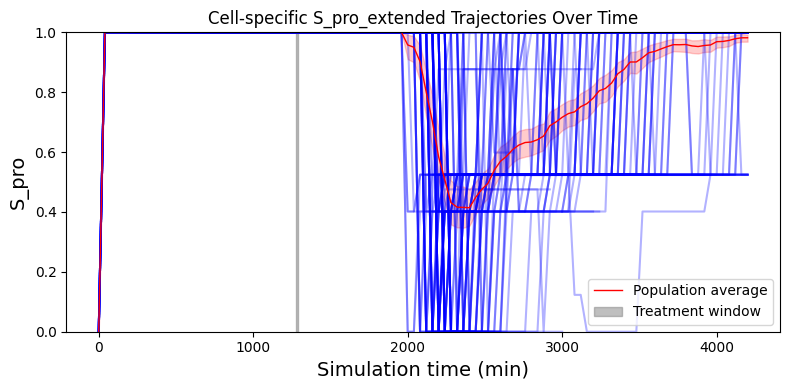

In [5]:
S_pro_data = all_data[['ID', 'time', 'S_pro_real', 'S_pro_extended']]

# Create figure with larger size for better visibility
plt.figure(figsize=(8, 4))

# Plot individual trajectories for each cell
# Use low alpha (transparency) to show density of trajectories
sns.lineplot(data=S_pro_data, 
            x='time', 
            y='S_pro_extended',
            units='ID',  # This tells seaborn to plot one line per ID
            estimator=None,  # Don't compute an average
            alpha=0.3,  # Make individual lines very transparent
            color='blue')

# Add an average trend line on top
sns.lineplot(data=S_pro_data,
            x='time',
            y='S_pro_extended',
            color='red',
            linewidth=1,
            label='Population average')

# Add title and labels
plt.title('Cell-specific S_pro_extended Trajectories Over Time')
plt.xlabel('Simulation time (min)', fontsize=14)
plt.ylabel('S_pro', fontsize=14)
# plt.xlim(0, 4200)
plt.ylim(0, 1)

# Add shaded area between 500 and 600 (if this is still relevant)
plt.axvspan(1280, 1292, color='gray', alpha=0.5, label='Treatment window')
# plt.axvspan(0, 12, color='gray', alpha=0.5, label='Treatment window')

# Adjust legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Save the plot
output_dir = "./results/trajectories_real_readouts_steady_and_transient_with_network_reset_test"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/S_pro_extended_trajectories_PI3K_top1_calibrated.png', dpi=300)
plt.show()

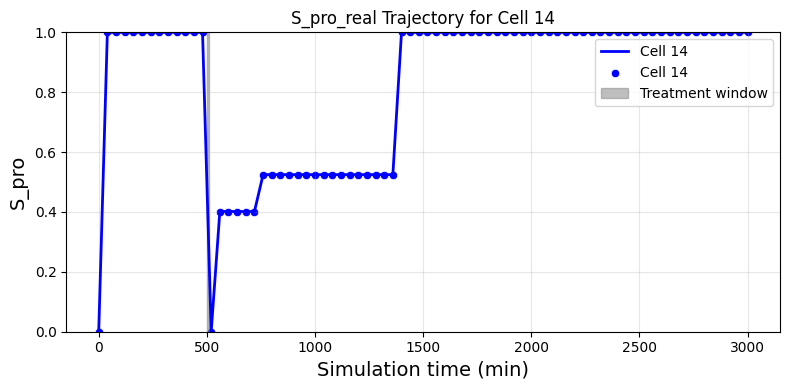

In [88]:
# Select a specific ID (for example, ID = 0)

# get a random cell id between the ones in S_anti_real_data
pro_cell_id = np.random.choice(S_pro_data['ID'].unique())
pro_single_cell_data = S_pro_data[S_pro_data['ID'] == pro_cell_id]

# Create figure
plt.figure(figsize=(8, 4))

# Plot trajectory for single cell
sns.lineplot(data=pro_single_cell_data,
            x='time',
            y='S_pro_extended',
            color='blue',
            linewidth=2,
            label=f'Cell {pro_cell_id}')

sns.scatterplot(data=pro_single_cell_data,
            x='time',
            y='S_pro_extended',
            color='blue',
            label=f'Cell {pro_cell_id}')

# Add title and labels
plt.title(f'S_pro_real Trajectory for Cell {pro_cell_id}')
plt.xlabel('Simulation time (min)', fontsize=14)
plt.ylabel('S_pro', fontsize=14)

# add xmin 0
# plt.xlim(0, 5000)
plt.ylim(0, 1)
# Add treatment window if relevant
plt.axvspan(500, 512, color='gray', alpha=0.5, label='Treatment window')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Save the plot
output_dir = "./results/single_cell_trajectories_extended_readouts_transient_with_network_reset_test"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/S_pro_extended_trajectory_cell_{pro_cell_id}.png', dpi=300)
plt.show()

### apoptosis hill transfer function with intersecting S_anti_real values

{'hill_coeff_apoptosis': 8.626336161246218, 'K_half_apoptosis': 0.5624811825518842, 'max_apoptosis_rate': 0.001884487453650244, 'apoptosis_rate_basal': 5.31667e-05}
the unique values of S_anti_real are:  [0.         0.28483884 0.39535425 0.68019309 1.         0.60464575
 0.31980691 0.71516116]


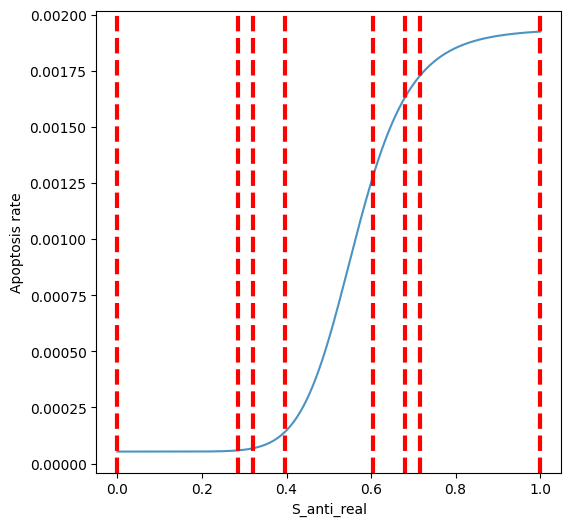

In [6]:
# filter all_data to include the apoptosis hill transfer function 

apoptosis_hill_tf_data = all_data[['hill_coeff_apoptosis', 'K_half_apoptosis', 'max_apoptosis_rate', 'apoptosis_rate_basal']]
# take a random row from apoptosis_hill_tf_data
random_row = apoptosis_hill_tf_data.sample(1)

# convert to a dictionary - don't include the row index
random_row_dict = random_row.to_dict(orient='records')[0]
print(random_row_dict)

x_values = np.linspace(0, 1, 1000)
# Calculate apoptosis values
apoptosis_values = ((random_row_dict['max_apoptosis_rate'] * (x_values ** random_row_dict['hill_coeff_apoptosis'])) / 
                    (random_row_dict['K_half_apoptosis'] ** random_row_dict['hill_coeff_apoptosis'] + 
                    (x_values ** random_row_dict['hill_coeff_apoptosis'])) + 
                    random_row_dict['apoptosis_rate_basal'])

# Plot with improved visibility
fig = plt.figure(figsize=(6, 6))
plt.plot(x_values, apoptosis_values, linewidth=1.5, alpha=0.8)
plt.xlabel('S_anti_real')
plt.ylabel('Apoptosis rate')

S_anti_real_values = S_anti_data['S_anti_real'].unique()
print("the unique values of S_anti_real are: ", S_anti_real_values)
for value in S_anti_real_values:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=3)

output_dir = "./results/transfer_functions_transient_test"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/apoptosis_hill_transfer_function_PI3K_top1_calibrated.png', dpi=300)

the same plot but with S_anti_extended values






.

{'hill_coeff_apoptosis': 8.626336161246218, 'K_half_apoptosis': 0.5624811825518842, 'max_apoptosis_rate': 0.001884487453650244, 'apoptosis_rate_basal': 5.31667e-05}
the unique values of S_anti_extended are:  [0.         0.28483884 0.39535425 0.68019309 1.         0.60464575
 0.31980691 0.71516116]


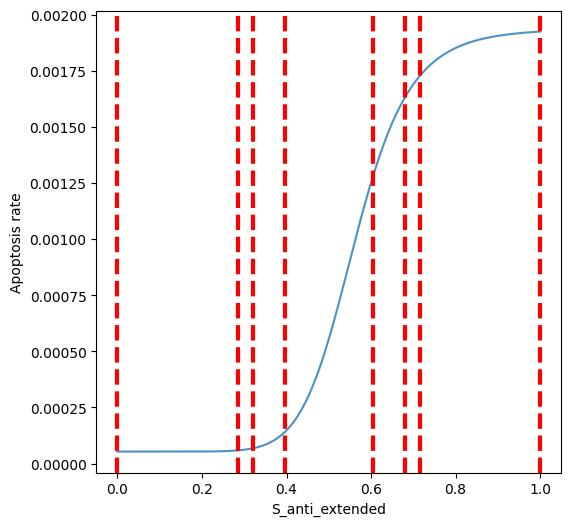

In [7]:
# filter all_data to include the apoptosis hill transfer function 

apoptosis_hill_tf_data = all_data[['hill_coeff_apoptosis', 'K_half_apoptosis', 'max_apoptosis_rate', 'apoptosis_rate_basal']]
# take a random row from apoptosis_hill_tf_data
random_row = apoptosis_hill_tf_data.sample(1)

# convert to a dictionary - don't include the row index
random_row_dict = random_row.to_dict(orient='records')[0]
print(random_row_dict)

x_values = np.linspace(0, 1, 1000)
# Calculate apoptosis values
apoptosis_values = ((random_row_dict['max_apoptosis_rate'] * (x_values ** random_row_dict['hill_coeff_apoptosis'])) / 
                    (random_row_dict['K_half_apoptosis'] ** random_row_dict['hill_coeff_apoptosis'] + 
                    (x_values ** random_row_dict['hill_coeff_apoptosis'])) + 
                    random_row_dict['apoptosis_rate_basal'])

# Plot with improved visibility
fig = plt.figure(figsize=(6, 6))
plt.plot(x_values, apoptosis_values, linewidth=1.5, alpha=0.8)
plt.xlabel('S_anti_extended')
plt.ylabel('Apoptosis rate')

S_anti_extended_values = S_anti_data['S_anti_extended'].unique()
print("the unique values of S_anti_extended are: ", S_anti_extended_values)
for value in S_anti_extended_values:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=3)

output_dir = "./results/transfer_functions_ extended_readouts_transient_test"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/apoptosis_hill_transfer_function_PI3K_top1_calibrated.png', dpi=300)

### plot growth hill transfer function with intersecting S_pro values

the base plot with our 3 main growth nodes (cMYC, TCF, RSK)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'hill_coeff_growth': 8.724094078455428, 'K_half_growth': 0.3044761494772531, 'basal_growth_rate': 0.0005743405680398065}
the unique values of S_pro_real are:  [0.         1.         0.40152421 0.52466574]


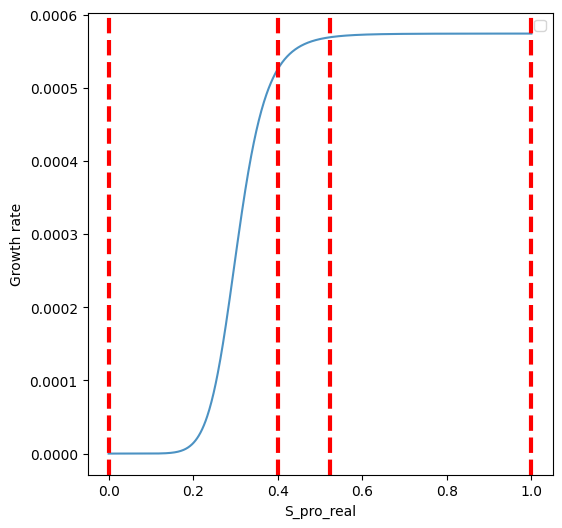

In [57]:
# filter all_data to include the apoptosis hill transfer function 

growth_hill_tf_data = all_data[['hill_coeff_growth', 'K_half_growth', 'basal_growth_rate']]
# take a random row from growth_hill_tf_data
random_row = growth_hill_tf_data.sample(1)

# convert to a dictionary - don't include the row index
random_row_dict = random_row.to_dict(orient='records')[0]
print(random_row_dict)

x_values = np.linspace(0, 1, 1000)

# Calculate Hill function values
growth_values = ((random_row_dict['basal_growth_rate'] * (x_values ** random_row_dict['hill_coeff_growth'])) / 
                (random_row_dict['K_half_growth'] ** random_row_dict['hill_coeff_growth'] + 
                (x_values ** random_row_dict['hill_coeff_growth'])))

# Plot with improved visibility
fig = plt.figure(figsize=(6, 6))
plt.plot(x_values, growth_values, linewidth=1.5, alpha=0.8)
plt.xlabel('S_pro_real')
plt.ylabel('Growth rate')

S_pro_values = S_pro_data['S_pro_real'].unique()
print("the unique values of S_pro_real are: ", S_pro_values)
for value in S_pro_values:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=3)


plt.legend()

output_dir = "./results/transfer_functions_transient_test"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/prosurvival_hill_transfer_function_PI3K_top1_calibrated.png', dpi=300)


the same plot but with S_pro_extended values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'hill_coeff_growth': 8.724094078455428, 'K_half_growth': 0.3044761494772531, 'basal_growth_rate': 0.0005743405680398065}
the unique values of S_pro_extended are:  [0.         1.         0.40152421 0.52466574 0.47533426 0.87685847
 0.59847579 0.12314153]


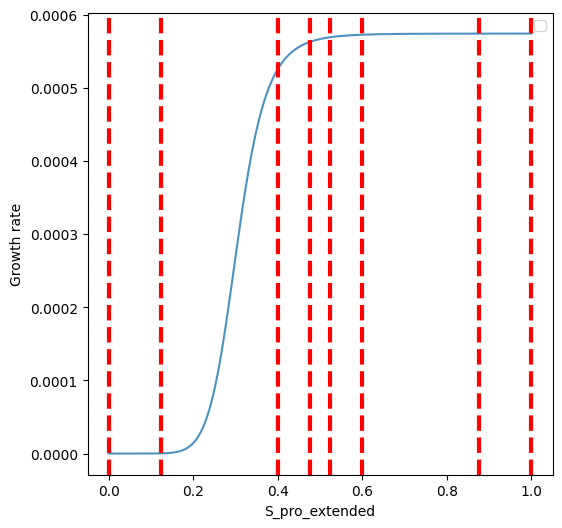

In [8]:
# filter all_data to include the apoptosis hill transfer function 

growth_hill_tf_data = all_data[['hill_coeff_growth', 'K_half_growth', 'basal_growth_rate']]
# take a random row from growth_hill_tf_data
random_row = growth_hill_tf_data.sample(1)

# convert to a dictionary - don't include the row index
random_row_dict = random_row.to_dict(orient='records')[0]
print(random_row_dict)

x_values = np.linspace(0, 1, 1000)

# Calculate Hill function values
growth_values = ((random_row_dict['basal_growth_rate'] * (x_values ** random_row_dict['hill_coeff_growth'])) / 
                (random_row_dict['K_half_growth'] ** random_row_dict['hill_coeff_growth'] + 
                (x_values ** random_row_dict['hill_coeff_growth'])))

# Plot with improved visibility
fig = plt.figure(figsize=(6, 6))
plt.plot(x_values, growth_values, linewidth=1.5, alpha=0.8)
plt.xlabel('S_pro_extended')
plt.ylabel('Growth rate')

S_pro_values = S_pro_data['S_pro_extended'].unique()
print("the unique values of S_pro_extended are: ", S_pro_values)
for value in S_pro_values:
    plt.axvline(x=value, color='red', linestyle='--', linewidth=3)


plt.legend()

output_dir = "./results/transfer_functions_transient_test"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/prosurvival_hill_transfer_function_PI3K_top1_calibrated.png', dpi=300)


### apoptosis nodes over time 

#### the normal apoptosis nodes (FOXO, Caspase8, Caspase9)

/tmp/ipykernel_12412/542527736.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  node_data[base_name] = (x_col | y_col).astype(int)


Index(['time', 'akt_node', 'anti_akt_node', 'anti_mek_node', 'anti_pi3k_node',
       'anti_tak1_node', 'drug_X_node_rate', 'drug_X_node_rate_scaling',
       'drug_X_node_rate_threshold', 'mek_node', 'node_BAD', 'node_BAX',
       'node_BCL2', 'node_Caspase8', 'node_Caspase9', 'node_CytochromeC',
       'node_FOXO', 'node_LEF', 'node_PDK1', 'node_RSK', 'node_S6K',
       'node_TCF', 'node_cMYC', 'node_mTORC1', 'node_p53', 'pi3k_node',
       'tak1_node', 'node_CCND1', 'node_Caspase37'],
      dtype='object')


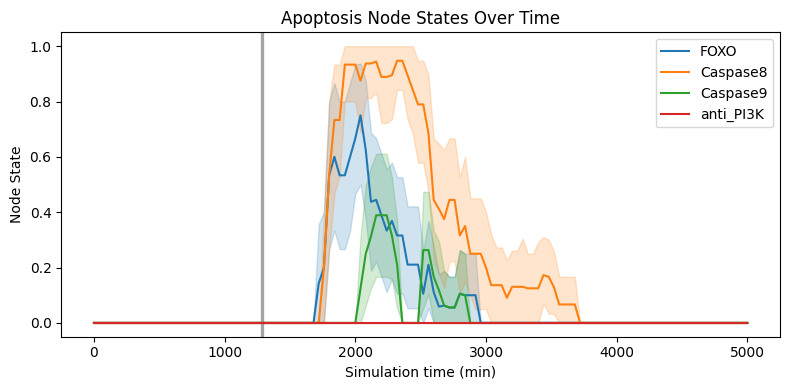

In [10]:
# subset all_data to only include the "node" columns + time
node_data = all_data[['time'] + [col for col in all_data.columns if 'node' in col]]
# substitute all NaN with 0
# node_data = node_data.fillna(0)


# First identify the base names that have _x and _y suffixes
base_names = []
for col in node_data.columns:
    if col.endswith('_x'):
        base_name = col[:-2]  # Remove '_x'
        if f"{base_name}_y" in node_data.columns:
            base_names.append(base_name)

# First convert float columns to boolean, then perform logical OR
for base_name in base_names:
    # Convert float columns to boolean (True if > 0, False otherwise)
    x_col = node_data[f"{base_name}_x"].fillna(0).astype(bool)
    y_col = node_data[f"{base_name}_y"].fillna(0).astype(bool)
    
    # Perform logical OR and convert back to int
    node_data[base_name] = (x_col | y_col).astype(int)
    
    # Drop the original _x and _y columns
    node_data = node_data.drop([f"{base_name}_x", f"{base_name}_y"], axis=1)

print(node_data.columns)

# Create a figure with a larger size
plt.figure(figsize=(8, 4))

# Plot all three apoptosis nodes
sns.lineplot(x='time', y='node_FOXO', data=node_data, label='FOXO')
sns.lineplot(x='time', y='node_Caspase8', data=node_data, label='Caspase8')
sns.lineplot(x='time', y='node_Caspase9', data=node_data, label='Caspase9')
sns.lineplot(x='time', y='anti_pi3k_node', data=node_data, label='anti_PI3K')

# add pi3k inhibition
# sns.lineplot(x='time', y='anti_pi3k_node', data=node_data, label='anti_pi3k')
# sns.lineplot(x='time', y='pi3k_node', data=node_data, label='pi3k')

plt.axvspan(1280, 1292, color='gray', alpha=0.6)
# plt.axvspan(0, 12, color='gray', alpha=0.6)

# Add title and labels
plt.title('Apoptosis Node States Over Time')
plt.xlabel('Simulation time (min)')
plt.ylabel('Node State')
plt.legend()

# Adjust layout to prevent label clipping
plt.tight_layout()
 

# Save and show the plot
output_dir = "./results/node_states_real_readouts_steady_and_transient_with_network_reset_test"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/apoptosis_nodes_PI3K_top1_calibrated.png')
plt.show()

#### plot extended apoptosis readouts over time


/tmp/ipykernel_7676/328437258.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  node_data[base_name] = (x_col | y_col).astype(int)


Index(['time', 'akt_node', 'anti_akt_node', 'anti_mek_node', 'anti_pi3k_node',
       'anti_tak1_node', 'drug_X_node_rate', 'drug_X_node_rate_scaling',
       'drug_X_node_rate_threshold', 'mek_node', 'node_BAD', 'node_BAX',
       'node_BCL2', 'node_Caspase8', 'node_Caspase9', 'node_CytochromeC',
       'node_FOXO', 'node_LEF', 'node_PDK1', 'node_RSK', 'node_S6K',
       'node_TCF', 'node_cMYC', 'node_mTORC1', 'node_p53', 'pi3k_node',
       'tak1_node', 'node_CCND1', 'node_Caspase37'],
      dtype='object')


ValueError: Could not interpret value `node_anti_PI3K` for `y`. An entry with this name does not appear in `data`.

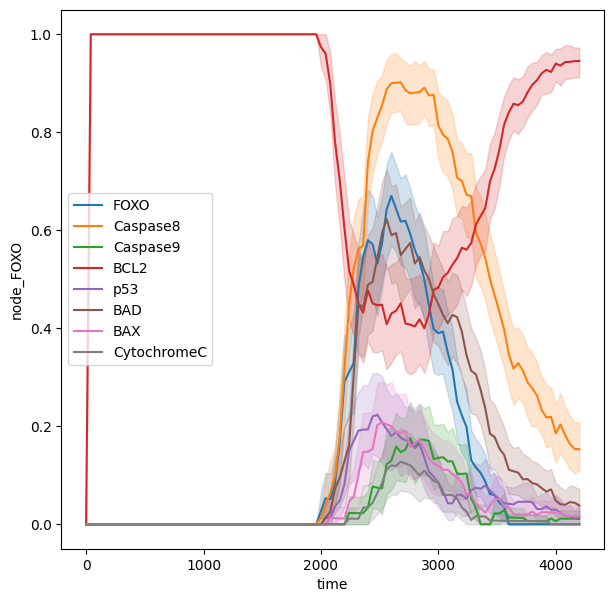

In [15]:
# subset all_data to only include the "node" columns + time
node_data = all_data[['time'] + [col for col in all_data.columns if 'node' in col]]
# substitute all NaN with 0
# node_data = node_data.fillna(0)


# First identify the base names that have _x and _y suffixes
base_names = []
for col in node_data.columns:
    if col.endswith('_x'):
        base_name = col[:-2]  # Remove '_x'
        if f"{base_name}_y" in node_data.columns:
            base_names.append(base_name)

# First convert float columns to boolean, then perform logical OR
for base_name in base_names:
    # Convert float columns to boolean (True if > 0, False otherwise)
    x_col = node_data[f"{base_name}_x"].fillna(0).astype(bool)
    y_col = node_data[f"{base_name}_y"].fillna(0).astype(bool)
    
    # Perform logical OR and convert back to int
    node_data[base_name] = (x_col | y_col).astype(int)
    
    # Drop the original _x and _y columns
    node_data = node_data.drop([f"{base_name}_x", f"{base_name}_y"], axis=1)

print(node_data.columns)

# Create a figure with a larger size
plt.figure(figsize=(7, 7))

# Plot all three apoptosis nodes
sns.lineplot(x='time', y='node_FOXO', data=node_data, label='FOXO')
sns.lineplot(x='time', y='node_Caspase8', data=node_data, label='Caspase8')
sns.lineplot(x='time', y='node_Caspase9', data=node_data, label='Caspase9')
sns.lineplot(x='time', y='node_BCL2', data=node_data, label='BCL2')
sns.lineplot(x='time', y='node_p53', data=node_data, label='p53')
sns.lineplot(x='time', y='node_BAD', data=node_data, label='BAD') 
sns.lineplot(x='time', y='node_BAX', data=node_data, label='BAX')
sns.lineplot(x='time', y='node_CytochromeC', data=node_data, label='CytochromeC')
sns.lineplot(x='time', y='node_anti_PI3K', data=node_data, label='anti_PI3K')


# add pi3k inhibition
# sns.lineplot(x='time', y='anti_pi3k_node', data=node_data, label='anti_pi3k')
# sns.lineplot(x='time', y='pi3k_node', data=node_data, label='pi3k')

# plt.axvspan(1280, 1292, color='gray', alpha=0.6)
plt.axvspan(500, 512, color='gray', alpha=0.6)

# Add title and labels
plt.title('Apoptosis Node States Over Time')
plt.xlabel('Time')
plt.ylabel('Node State')
plt.legend()

# Adjust layout to prevent label clipping
plt.tight_layout()

# Save and show the plot
output_dir = "./results/node_states_extended_readouts_transient_test"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/apoptosis_nodes_PI3K_top1_calibrated.png')
plt.show()

### growth mapping nodes over time 

/tmp/ipykernel_7676/2611954559.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  node_data[base_name] = (x_col | y_col).astype(int)


Index(['time', 'akt_node', 'anti_akt_node', 'anti_mek_node', 'anti_pi3k_node',
       'anti_tak1_node', 'mek_node', 'node_BAD', 'node_BAX', 'node_BCL2',
       'node_Caspase8', 'node_Caspase9', 'node_CytochromeC', 'node_FOXO',
       'node_LEF', 'node_PDK1', 'node_RSK', 'node_S6K', 'node_TCF',
       'node_cMYC', 'node_mTORC1', 'node_p53', 'pi3k_node', 'tak1_node',
       'node_CCND1', 'node_Caspase37'],
      dtype='object')


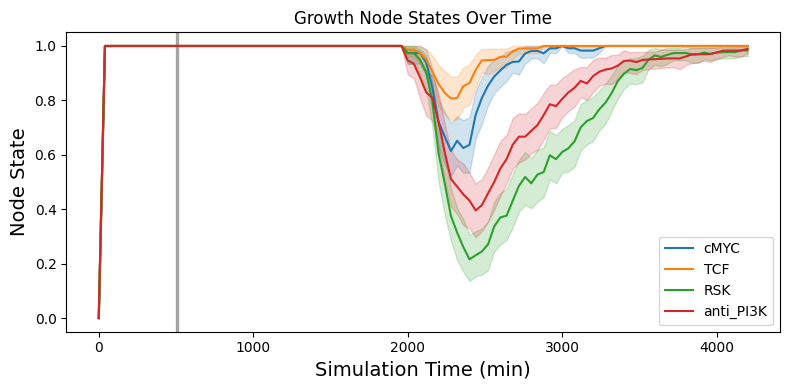

In [14]:
# subset all_data to only include the "node" columns + time
node_data = all_data[['time'] + [col for col in all_data.columns if 'node' in col and not 'drug_X' in col]]
# substitute all NaN with 0
# node_data = node_data.fillna(0)


# First identify the base names that have _x and _y suffixes
base_names = []
for col in node_data.columns:
    if col.endswith('_x'):
        base_name = col[:-2]  # Remove '_x'
        if f"{base_name}_y" in node_data.columns:
            base_names.append(base_name)

# First convert float columns to boolean, then perform logical OR
for base_name in base_names:
    # Convert float columns to boolean (True if > 0, False otherwise)
    x_col = node_data[f"{base_name}_x"].fillna(0).astype(bool)
    y_col = node_data[f"{base_name}_y"].fillna(0).astype(bool)
    
    # Perform logical OR and convert back to int
    node_data[base_name] = (x_col | y_col).astype(int)
    
    # Drop the original _x and _y columns
    node_data = node_data.drop([f"{base_name}_x", f"{base_name}_y"], axis=1)

print(node_data.columns)

# Create a figure with a larger size
plt.figure(figsize=(8, 4))

# Plot all three apoptosis nodes
sns.lineplot(x='time', y='node_cMYC', data=node_data, label='cMYC')
sns.lineplot(x='time', y='node_TCF', data=node_data, label='TCF')
sns.lineplot(x='time', y='node_RSK', data=node_data, label='RSK')
sns.lineplot(x='time', y='pi3k_node', data=node_data, label='anti_PI3K')

# add pi3k inhibition
# sns.lineplot(x='time', y='anti_pi3k_node', data=node_data, label='anti_pi3k')
# sns.lineplot(x='time', y='pi3k_node', data=node_data, label='pi3k')

# plt.axvspan(1280, 1292, color='gray', alpha=0.6)
plt.axvspan(500, 512, color='gray', alpha=0.6)

# Add title and labels
plt.title('Growth Node States Over Time')
plt.xlabel('Simulation Time (min)', fontsize=14)
plt.ylabel('Node State', fontsize=14)
plt.legend()

# Adjust layout to prevent label clipping
plt.tight_layout()

# Save and show the plot
output_dir = "./results/node_states_transient_test"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/PI3K_top1_calibrated_growth_nodes.png')
plt.show()

/tmp/ipykernel_27034/3190839294.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  node_data[base_name] = (x_col | y_col).astype(int)


Index(['time', 'akt_node', 'anti_akt_node', 'anti_mek_node', 'anti_pi3k_node',
       'anti_tak1_node', 'mek_node', 'node_BAD', 'node_BAX', 'node_BCL2',
       'node_Caspase8', 'node_Caspase9', 'node_CytochromeC', 'node_FOXO',
       'node_LEF', 'node_PDK1', 'node_RSK', 'node_S6K', 'node_TCF',
       'node_cMYC', 'node_mTORC1', 'node_p53', 'pi3k_node', 'tak1_node',
       'node_CCND1', 'node_Caspase37', 'node_anti_PI3K'],
      dtype='object')


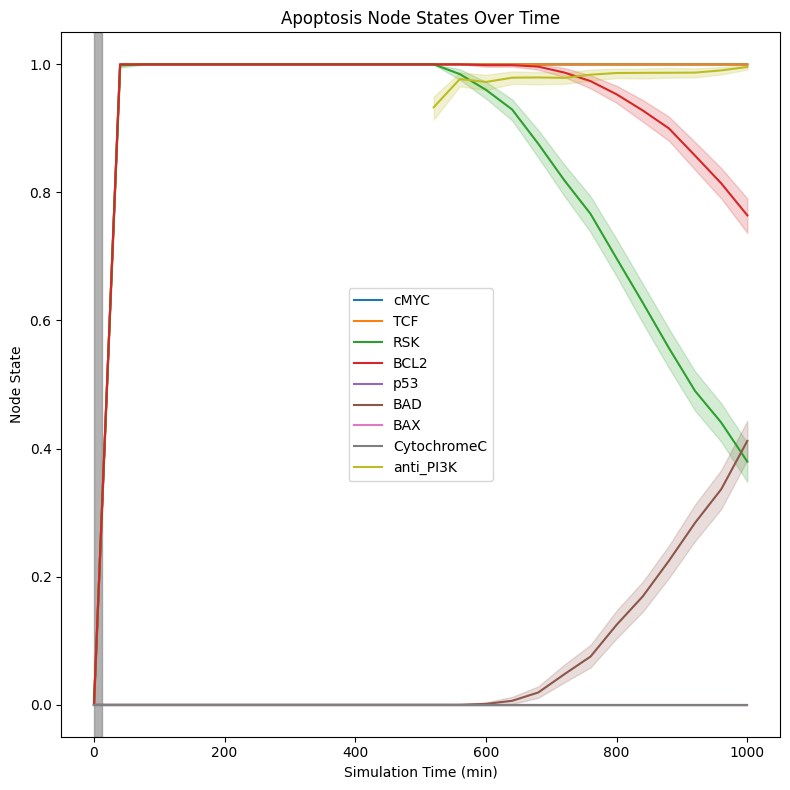

In [18]:
# subset all_data to only include the "node" columns + time
node_data = all_data[['time'] + [col for col in all_data.columns if 'node' in col]]
# substitute all NaN with 0
# node_data = node_data.fillna(0)


# First identify the base names that have _x and _y suffixes
base_names = []
for col in node_data.columns:
    if col.endswith('_x'):
        base_name = col[:-2]  # Remove '_x'
        if f"{base_name}_y" in node_data.columns:
            base_names.append(base_name)

# First convert float columns to boolean, then perform logical OR
for base_name in base_names:
    # Convert float columns to boolean (True if > 0, False otherwise)
    x_col = node_data[f"{base_name}_x"].fillna(0).astype(bool)
    y_col = node_data[f"{base_name}_y"].fillna(0).astype(bool)
    
    # Perform logical OR and convert back to int
    node_data[base_name] = (x_col | y_col).astype(int)
    
    # Drop the original _x and _y columns
    node_data = node_data.drop([f"{base_name}_x", f"{base_name}_y"], axis=1)

print(node_data.columns)

# Create a figure with a larger size
plt.figure(figsize=(8, 8))

# Plot all three apoptosis nodes
sns.lineplot(x='time', y='node_cMYC', data=node_data, label='cMYC')
sns.lineplot(x='time', y='node_TCF', data=node_data, label='TCF')
sns.lineplot(x='time', y='node_RSK', data=node_data, label='RSK')
sns.lineplot(x='time', y='node_BCL2', data=node_data, label='BCL2')
sns.lineplot(x='time', y='node_p53', data=node_data, label='p53')
sns.lineplot(x='time', y='node_BAD', data=node_data, label='BAD')
sns.lineplot(x='time', y='node_BAX', data=node_data, label='BAX')
sns.lineplot(x='time', y='node_CytochromeC', data=node_data, label='CytochromeC')
sns.lineplot(x='time', y='node_anti_PI3K', data=node_data, label='anti_PI3K')

# add pi3k inhibition
# sns.lineplot(x='time', y='anti_pi3k_node', data=node_data, label='anti_pi3k')
# sns.lineplot(x='time', y='pi3k_node', data=node_data, label='pi3k')

# plt.axvspan(1280, 1292, color='gray', alpha=0.6)
plt.axvspan(0, 12, color='gray', alpha=0.6)

# Add title and labels
plt.title('Apoptosis Node States Over Time')
plt.xlabel('Simulation Time (min)')
plt.ylabel('Node State')
plt.legend()

# Adjust layout to prevent label clipping
plt.tight_layout()

# Save and show the plot
output_dir = "./results/node_states_extended_readouts_transient_test"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/PI3K_top1_calibrated_growth_nodes.png')
plt.show()

### plot apoptosis rate over time


Index(['time', 'K_half_apoptosis', 'apoptosis_mapping_type', 'apoptosis_rate',
       'apoptosis_rate_basal', 'hill_coeff_apoptosis', 'max_apoptosis_rate',
       'response_rate_apoptosis'],
      dtype='object')


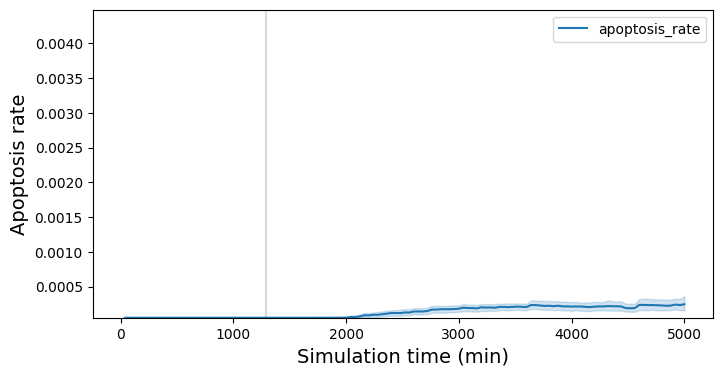

In [40]:
# filter all_data to include columns with "apoptosis" in the name
apoptosis_data = all_data[['time'] + [col for col in all_data.columns if 'apoptosis' in col]]
print(apoptosis_data.columns)

# fetch maximum and minimum apoptosis rate
max_apoptosis_rate = apoptosis_data['max_apoptosis_rate'].unique()[0]
min_apoptosis_rate = apoptosis_data['apoptosis_rate_basal'].unique()[0]

# plot the apoptosis rate o ver time
plt.figure(figsize=(8, 4))
sns.lineplot(x='time', y='apoptosis_rate', data=apoptosis_data, label='apoptosis_rate')
plt.xlabel('Simulation time (min)', fontsize=14)
plt.ylabel('Apoptosis rate', fontsize=14)

# shade the treatment window
plt.axvspan(1280, 1292, color='gray', alpha=0.2, label='Treatment window')   
# plt.axvspan(0, 12, color='gray', alpha=0.2, label='Treatment window')

# y min and max from apoptosis_data
plt.ylim(min_apoptosis_rate, max_apoptosis_rate)
plt.show()


### plot growth rate over time

Index(['time', 'K_half_growth', 'basal_growth_rate', 'growth_mapping_type',
       'growth_rate', 'hill_coeff_growth', 'response_rate_growth'],
      dtype='object')


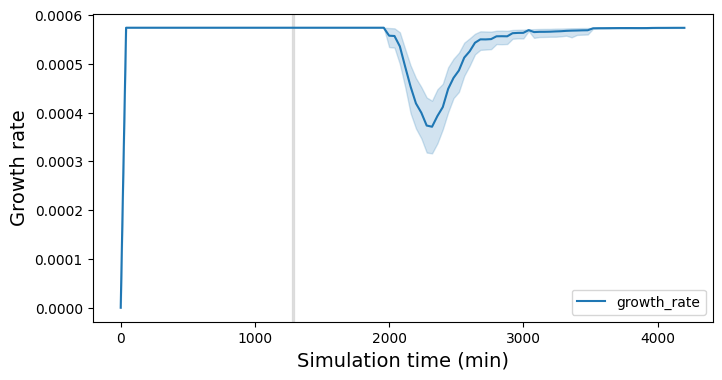

<Figure size 640x480 with 0 Axes>

In [10]:
# filter all_data to include columns with "apoptosis" in the name
growth_data = all_data[['time'] + [col for col in all_data.columns if 'growth' in col]]
print(growth_data.columns)

# fetch maximum and minimum growth rate
max_growth_rate = 0.0005183422495376739 
ma_growth_rate = growth_data['basal_growth_rate'].unique()[0]

# plot the apoptosis rate over time
plt.figure(figsize=(8, 4))
sns.lineplot(x='time', y='growth_rate', data=growth_data, label='growth_rate')
plt.xlabel('Simulation time (min)', fontsize=14)
plt.ylabel('Growth rate', fontsize=14)  
# shade the treatment window
# plt.axvspan(1280, 1292, color='gray', alpha=0.2, label='Treatment window')
plt.axvspan(1280, 1292, color='gray', alpha=0.2, label='Treatment window')
# set the maximum y value to tbe basal growth rate
# plt.ylim(0, ma_growth_rate)
plt.show()
output_dir = "./results/growth_rate_along_simulation_transient_with_network_reset_test"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/PI3K_top1_calibrated_extended_readouts_growth_rate.png')

### plot alive and dead cells over time


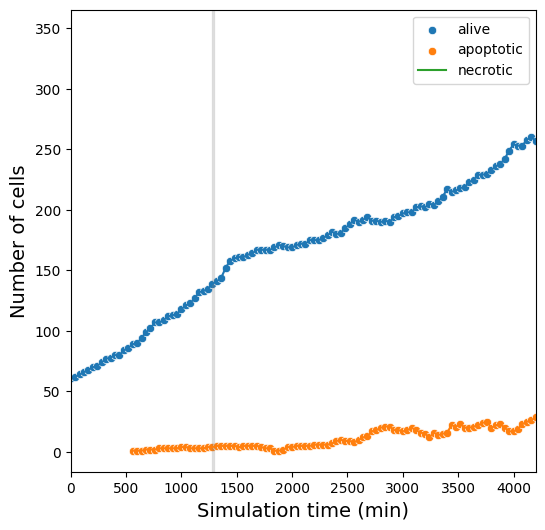

In [23]:
### plot alive and dead cells over time

# explore columns from all_data with "current_phase" in the name
current_phase_data = all_data[['time', 'ID'] + [col for col in all_data.columns if 'current_phase' in col]]


# count the number of alive cells over time
alive_cells = current_phase_data[current_phase_data['current_phase'] == "live"]
apoptotic_cells = current_phase_data[current_phase_data['current_phase'] == "apoptotic"]
necrotic_cells = current_phase_data[current_phase_data['current_phase'] == "necrotic"]

# aggegate by time and count the number of alive cells
alive_cells_agg = alive_cells.groupby('time').count()
apoptotic_cells_agg = apoptotic_cells.groupby('time').count()
necrotic_cells_agg = necrotic_cells.groupby('time').count()

# plot the number of alive cells over time
plt.figure(figsize=(6, 6), dpi=100)
sns.lineplot(x='time', y='ID', data=alive_cells_agg)
sns.scatterplot(x='time', y='ID', data=alive_cells_agg, label='alive')
sns.lineplot(x='time', y='ID', data=apoptotic_cells_agg)
sns.scatterplot(x='time', y='ID', data=apoptotic_cells_agg, label='apoptotic')
sns.lineplot(x='time', y='ID', data=necrotic_cells_agg, label='necrotic')
sns.scatterplot(x='time', y='ID', data=necrotic_cells_agg, label='necrotic')
plt.axvspan(1280, 1292, color='gray', alpha=0.2, label='Treatment window')
plt.xlabel('Simulation time (min)', fontsize=14)
plt.ylabel('Number of cells', fontsize=14)
# x lim 0 to 1300
plt.xlim(0, 4200)
plt.show()


### node OFF probability transfer function

plotting the intracellular amount of Drug-Target complex

NOTE: This is mainly to debug the MEK drug model, as it was not working properly.


Index(['time', 'drug_X_DT_conc'], dtype='object')


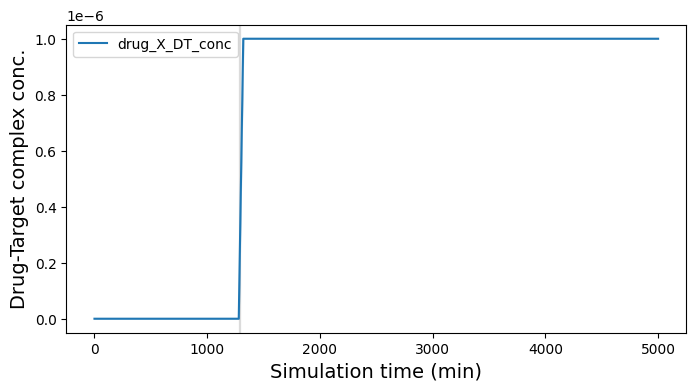

<Figure size 640x480 with 0 Axes>

In [14]:
# filter only drug_X parameters
kinetic_data = all_data[['time'] + [col for col in all_data.columns if 'drug_X_DT_conc' in col]]
print(kinetic_data.columns)



# plot the apoptosis rate over time
plt.figure(figsize=(8, 4))
sns.lineplot(x='time', y='drug_X_DT_conc', data=kinetic_data, label='drug_X_DT_conc')
plt.xlabel('Simulation time (min)', fontsize=14)
plt.ylabel('Drug-Target complex conc.', fontsize=14)  
# shade the treatment window
# plt.axvspan(1280, 1292, color='gray', alpha=0.2, label='Treatment window')
plt.axvspan(1280, 1292, color='gray', alpha=0.2, label='Treatment window')
# set the maximum y value to tbe basal growth rate
# plt.ylim(0, ma_growth_rate)
plt.show()
output_dir = "./results/DT_conc_over_time"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(f'{output_dir}/MEK_debug.png')